In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
#Load dataset
df = pd.read_csv('D:/MLPdata/recipes.csv')

In [3]:
# Select columns (features and target)
df_filtered = df.dropna(subset=['AggregatedRating', 'Calories', 'FatContent', 'ProteinContent', 'CarbohydrateContent','SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent'])

# Calculate the mean of various columns for each author
average_by_author = df_filtered.groupby(['AuthorId', 'AuthorName']).agg({
    'AggregatedRating': 'mean',
    'Calories': 'mean',
    'FatContent': 'mean',
    'ProteinContent': 'mean',
    'CarbohydrateContent': 'mean',
    'SaturatedFatContent': 'mean',
    'CholesterolContent': 'mean',
    'SodiumContent': 'mean',
    'FiberContent': 'mean',
    'SugarContent': 'mean'
}).reset_index()

#Save result in csv to view
average_by_author.to_csv('D:/MLPdata/authorsum.csv')

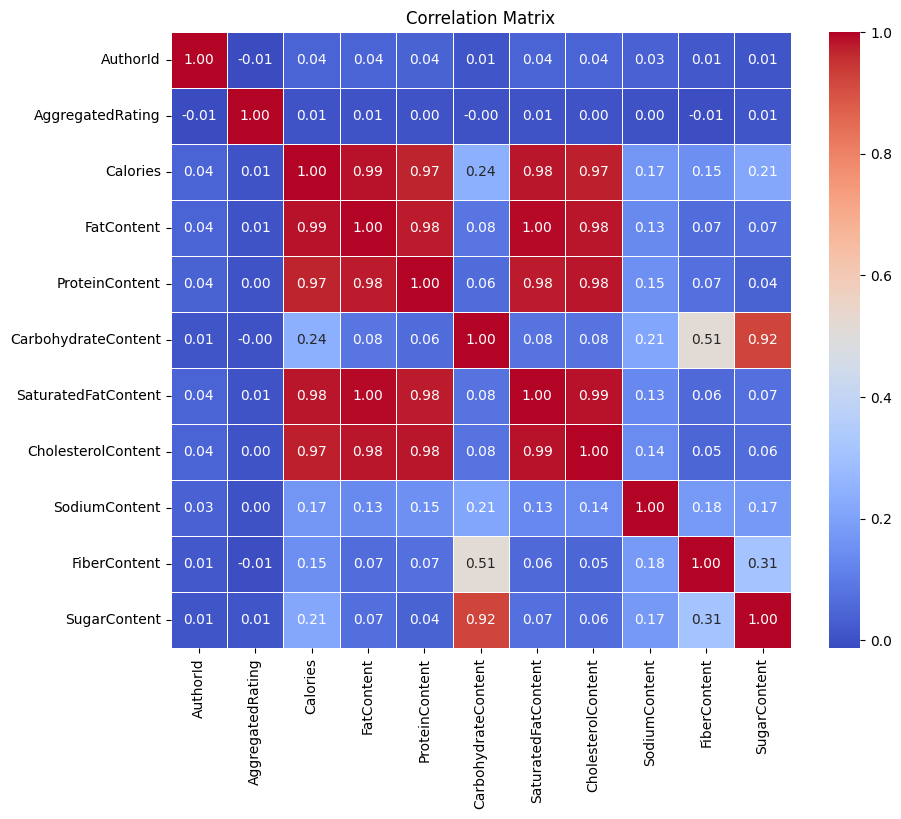

In [4]:
# Plot the correlation matrix using matplotlib and seaborn
numeric_columns =average_by_author.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

2D Linear Regression

In [5]:
# since correlation is high between calories, fat, protein and cholesterol, predicting cholesterol on the basis of the other features
X = average_by_author[['Calories', 'FatContent', 'ProteinContent']].values
y =average_by_author['CholesterolContent'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a polynomial regression model
degree = 2  # Degree of the polynomial (2 for 2d(quadratic) linear regression)
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Evaluate the model
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 90555931.17039077
R-squared Score: -78.531143748543


In [7]:
# since correlation is high between calories, fat, protein and cholesterol, predicting cholesterol on the basis of the other features

# Normalizing the feature variables
scaler = StandardScaler()
df_normalized = average_by_author.copy()  # Create a copy of the original DataFrame

# Select columns to normalize
cols_to_normalize = ['Calories', 'FatContent', 'ProteinContent','CholesterolContent']
df_normalized[cols_to_normalize] = scaler.fit_transform(df_normalized[cols_to_normalize])

# Removing outliers
z_scores = (df_normalized[cols_to_normalize] - df_normalized[cols_to_normalize].mean()) / df_normalized[cols_to_normalize].std()
df_cleaned = df_normalized[(z_scores < 3).all(axis=1)]  # Keep only rows where all z-scores are less than 3

# 3. Perform regression on the cleaned data
X = df_cleaned[['Calories', 'FatContent', 'ProteinContent']].values
y = df_cleaned['CholesterolContent'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a polynomial regression model
degree = 2  # Degree of the polynomial (2 for 2d quadratic linear regression)
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Evaluate the model
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 0.01725980445985578
R-squared Score: 0.5544604613188917


In [17]:

# Custom data to predict
custom_data = {
    'Calories': 574.034375,
    'FatContent':36.1875,
    'ProteinContent': 19.66875,
    'CholesterolContent' : 0
}
custom_df = pd.DataFrame([custom_data])

# Normalize the feature variables using the same scaler used for training data
custom_df_normalized = scaler.transform(custom_df)

# Transform the normalized features using polynomial features
custom_df_normalized = custom_df_normalized[:, :3]
custom_df_poly = poly_features.transform(custom_df_normalized)



# Make predictions using the trained model
custom_predictions = model.predict(custom_df_poly)

# Display the predicted CholesterolContent in non-normalized form
custom_predictions =[[0,0,0,custom_predictions[0]]]
custom_prediction = scaler.inverse_transform(custom_predictions)
print("Cholesterol for input features: ")
print(custom_prediction[0][3])



Cholesterol for input features: 
108.86509643542861


1d (Linear Regression)

In [18]:

# 1. Normalize the feature variables
scaler = StandardScaler()
df_normalized = average_by_author.copy()  # Create a copy of the original DataFrame

# Select columns to normalize
cols_to_normalize = ['Calories', 'FatContent', 'ProteinContent','CholesterolContent']
df_normalized[cols_to_normalize] = scaler.fit_transform(df_normalized[cols_to_normalize])

# 2. Remove outliers
z_scores = (df_normalized[cols_to_normalize] - df_normalized[cols_to_normalize].mean()) / df_normalized[cols_to_normalize].std()
df_cleaned = df_normalized[(z_scores < 3).all(axis=1)]  # Keep only rows where all z-scores are less than 3

# 3. Perform regression on the cleaned data
X = df_cleaned[['Calories', 'FatContent', 'ProteinContent']].values
y = df_cleaned['CholesterolContent'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a polynomial regression model
degree = 1 # Degree of the polynomial 
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Evaluate the model
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.017688820789387338
R-squared Score: 0.5433859594037205


In [19]:
# Custom data to predict
custom_data = {
    'Calories': 574.034375,
    'FatContent':36.1875,
    'ProteinContent': 19.66875,
    'CholesterolContent' : 0
}
custom_df = pd.DataFrame([custom_data])

# Normalize the feature variables using the same scaler used for training data
custom_df_normalized = scaler.transform(custom_df)

# Transform the normalized features using polynomial features
custom_df_normalized = custom_df_normalized[:, :3]
custom_df_poly = poly_features.transform(custom_df_normalized)



# Make predictions using the trained model
custom_predictions = model.predict(custom_df_poly)

# Display the predicted CholesterolContent in non-normalized form
custom_predictions =[[0,0,0,custom_predictions[0]]]
custom_prediction = scaler.inverse_transform(custom_predictions)
print("Cholesterol for input features: ")
print(custom_prediction[0][3])


Cholesterol for input features: 
107.47279892241194


3d Polynomial Regression

In [21]:
# 1. Normalize the feature variables
scaler = StandardScaler()
df_normalized = average_by_author.copy()  # Create a copy of the original DataFrame

# Select columns to normalize
cols_to_normalize = ['Calories', 'FatContent', 'ProteinContent','CholesterolContent']
df_normalized[cols_to_normalize] = scaler.fit_transform(df_normalized[cols_to_normalize])

# 2. Remove outliers
# You can define your criteria for outliers removal, such as z-score or IQR method

# Example using z-score method to remove outliers
z_scores = (df_normalized[cols_to_normalize] - df_normalized[cols_to_normalize].mean()) / df_normalized[cols_to_normalize].std()
df_cleaned = df_normalized[(z_scores < 3).all(axis=1)]  # Keep only rows where all z-scores are less than 3

# 3. Perform regression on the cleaned data
X = df_cleaned[['Calories', 'FatContent', 'ProteinContent']].values
y = df_cleaned['CholesterolContent'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a polynomial regression model
degree = 3 # Degree of the polynomial (3 for 3d polynomial regression)
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Evaluate the model
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("**********"*10)

# Custom data to predict
custom_data = {
    'Calories': 574.034375,
    'FatContent':36.1875,
    'ProteinContent': 19.66875,
    'CholesterolContent' : 0
}
custom_df = pd.DataFrame([custom_data])

# Normalize the feature variables using the same scaler used for training data
custom_df_normalized = scaler.transform(custom_df)

# Transform the normalized features using polynomial features
custom_df_normalized = custom_df_normalized[:, :3]
custom_df_poly = poly_features.transform(custom_df_normalized)



# Make predictions using the trained model
custom_predictions = model.predict(custom_df_poly)

# Display the predicted CholesterolContent in non-normalized form
custom_predictions =[[0,0,0,custom_predictions[0]]]
custom_prediction = scaler.inverse_transform(custom_predictions)
print("Cholesterol for input features: ")
print(custom_prediction[0][3])


Mean Squared Error: 0.01681916779914358
R-squared Score: 0.5658349270607438
****************************************************************************************************
Cholesterol for input features: 
108.9366305130503
